In [14]:
import numpy
import urllib
import scipy.optimize
import random
from math import exp
from math import log
import csv
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [15]:
def parseData(fname):
  for l in urllib.urlopen(fname):
    yield eval(l)
    

In [16]:
print "Reading data..."
csvfile = file('winequality-white.csv','rb')
reader = csv.reader(csvfile)
print "done"


Reading data...
done


In [17]:
data = []
for line in reader:
    data.append(line[0].split(';'))
del data[0]


In [18]:
## Conversion from string to float
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j]=float(data[i][j])
        

In [19]:
## Obtain the quality
N=12
y=[x[N-1] for x in data]


In [20]:
## Extract the features data
for features in data:
    del features[N-1]

In [21]:
X=data

In [22]:
X_train = X[:int(len(X)/3)]
y_train = y[:int(len(y)/3)]
X_test = X[int(2*len(X)/3):]
y_test = y[int(2*len(y)/3):]

In [23]:
X_mean=[]
for i in range(11):
    X_temp =0
    for j in range(len(X_train)):
        X_temp+= X_train[j][i]
    X_mean_temp = X_temp / len(X_train)
    X_mean.append(X_mean_temp)

In [24]:
X_error=[[0] * 11 for row in range(len(X_train))]
for i in range(11):
    for j in range(len(X_train)):
        X_error[j][i] = X_train[j][i] - X_mean[i]
X_error = numpy.matrix(X_error)
reconstruction_error = 0
for j in range(len(X_train)):
    reconstruction_error+= X_error[j]*X_error[j].T
print "Reconstruction Error = ",reconstruction_error


Reconstruction Error =  [[ 3675818.61687812]]


In [25]:
pca = PCA(n_components=11)
pca.fit(X_train)
print pca.components_


[[  3.23636346e-04  -1.42201752e-04  -3.17030713e-04  -5.36390435e-02
   -9.30284526e-05  -2.54030965e-01  -9.65655009e-01  -3.19990241e-05
    2.95831396e-04  -3.84043646e-04   1.00526693e-02]
 [ -7.57985623e-03  -1.66366340e-03   1.04742899e-03   5.21677266e-02
    4.49425600e-05   9.65020304e-01  -2.56793964e-01   7.90089050e-06
    5.24900596e-04  -1.09699394e-03  -2.89827657e-03]
 [  1.82124420e-02   2.54680710e-03   3.31838657e-03   9.93221259e-01
   -1.51888372e-04  -6.42297821e-02  -3.91682592e-02   4.30929482e-04
   -6.93199060e-03  -2.85216045e-03  -8.62920933e-02]
 [ -1.56811999e-01  -3.28220652e-03  -1.66866136e-02  -8.28549640e-02
    6.91822288e-03  -1.13029682e-03  -5.39110108e-03   9.49080503e-04
   -2.68027305e-03  -1.30498102e-03  -9.83955205e-01]
 [ -9.81360642e-01   1.45890108e-02  -5.92643662e-02   3.17546064e-02
   -5.07483182e-04  -8.43759364e-03   1.77578042e-03  -6.03725221e-04
    9.05011239e-02   9.35630845e-03   1.54417839e-01]
 [ -7.76578401e-02   2.3766588

In [26]:
reconstruction_error = 0
phi = numpy.matrix(pca.components_)
for j in range(4,11):
    reconstruction_error+= phi[j]*X_error.T*X_error*phi[j].T
print "When 4 dimensional PCA, Reconstruction Error = ",reconstruction_error


When 4 dimensional PCA, Reconstruction Error =  [[ 1345.4755741]]


In [27]:
def feature(X,number):
    pca = PCA(n_components = number)
    pca.fit(X)
    X_trans = pca.transform(X)
    feat = [[1] for row in range(len(X_trans))]
    X_trans = numpy.column_stack((feat, X_trans))
    return X_trans


In [28]:
def msecomp(theta, X, y):
  theta = numpy.matrix(theta).T
  X = numpy.matrix(X)
  y = numpy.matrix(y).T
  diff = X*theta - y
  diffSq = diff.T*diff
  mse = diffSq / len(y)
  return mse.tolist()


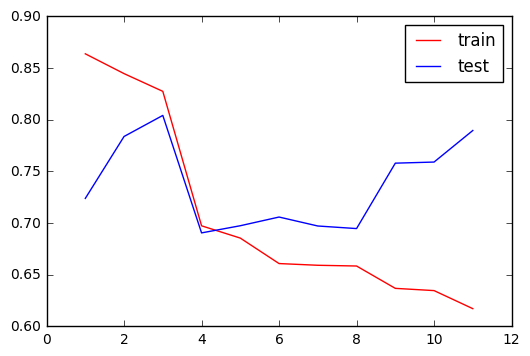

In [31]:
x = []
mse1 = []
mse2 = []
for number in range(1,12):
    x.append(number)
    X1 = feature(X_train, number)
    X2 = feature(X_test, number)
    theta,residuals,rank,s = numpy.linalg.lstsq(X1, y_train)
    mse1.append(msecomp(theta, X1, y_train)[0][0])
    mse2.append(msecomp(theta, X2, y_test)[0][0])
plt.plot(x, mse1, color='red', label = 'train')
plt.plot(x, mse2, color='blue', label = 'test')
plt.legend()
plt.show()

In [30]:
for number in range(1,12):
    X1 = feature(X_train,number)
    X2 = feature(X_test,number)
    theta,residuals,rank,s = numpy.linalg.lstsq(X1, y_train)
    mse1 = msecomp(theta, X1, y_train)
    mse2 = msecomp(theta, X2, y_test)
    print "using ",number," PCA dimensions, MSE on the train set is ",mse1, ", MSE on the test set is ",mse2


using  1  PCA dimensions, MSE on the train set is  [[0.8638424397359241]] , MSE on the test set is  [[0.7239167310065002]]
using  2  PCA dimensions, MSE on the train set is  [[0.8446694318557606]] , MSE on the test set is  [[0.7838412972045354]]
using  3  PCA dimensions, MSE on the train set is  [[0.8275161155852007]] , MSE on the test set is  [[0.8042167885128124]]
using  4  PCA dimensions, MSE on the train set is  [[0.6973832788752913]] , MSE on the test set is  [[0.6905359281602766]]
using  5  PCA dimensions, MSE on the train set is  [[0.6855015598792389]] , MSE on the test set is  [[0.6974658497146826]]
using  6  PCA dimensions, MSE on the train set is  [[0.6608539889873272]] , MSE on the test set is  [[0.7058775938678081]]
using  7  PCA dimensions, MSE on the train set is  [[0.6591945115452172]] , MSE on the test set is  [[0.6972049728696039]]
using  8  PCA dimensions, MSE on the train set is  [[0.6584860246102587]] , MSE on the test set is  [[0.6947137015246576]]
using  9  PCA di